In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2offline_ana_19840363_16477.00288.root")
f.ls()

TFile**		./data/gm2offline_ana_19840363_16477.00288.root	
 TFile*		./data/gm2offline_ana_19840363_16477.00288.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


In [3]:
t = f.Get("clusterCompare").Get("evwTree")

In [4]:
h = r.TH2D("h","Ratio of E_{full} to E_{trunc} vs. E_{full}; E_{full} [MeV]; E_{full} / E_{trunc}",600,0,6000,1000,0,2)

In [5]:
t.Draw("energyTruncTotalEnergy/energyFullTotalEnergy:energyFullTotalEnergy>>h","","goff")

12695756

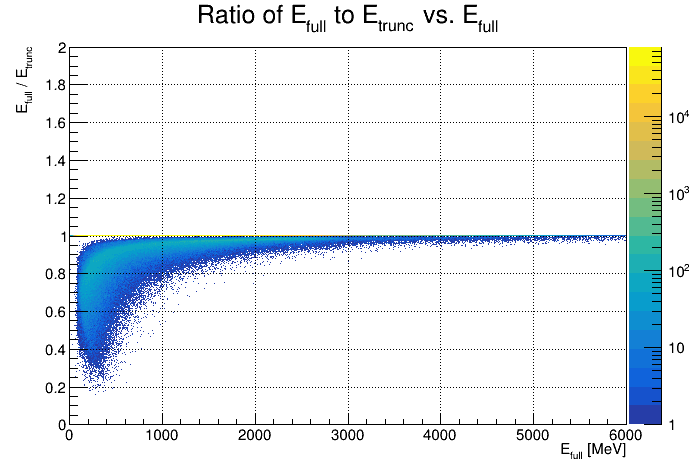

In [6]:
c = r.TCanvas()
h.Draw("colz")
c.SetLogz()
c.SetGrid()
c.Draw()

In [7]:
h_px = h.ProfileX().Clone()

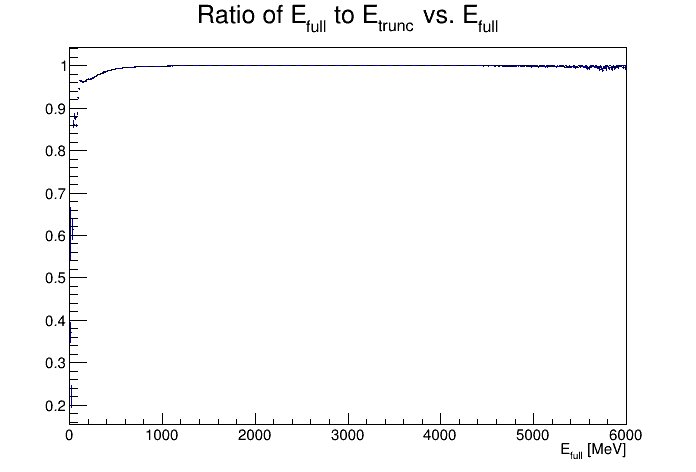

In [8]:
c = r.TCanvas()
h_px.Draw("colz")
c.SetLogz()
c.Draw()

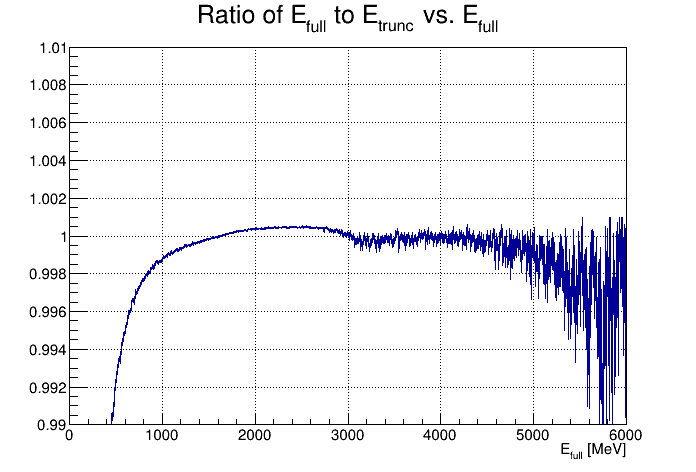

In [9]:
c = r.TCanvas()
h_px.GetYaxis().SetRangeUser(0.990,1.01)
h_px.Draw("hist e")
c.SetGrid()
c.Draw()

In [10]:
caloHists = []
for calo in range(1,25):
    print("Starting calo:", calo)
    h = r.TH2D("h","Ratio of E_{full} to E_{trunc} vs. E_{full} for Calo "+str(calo)+"; E_{full} [MeV]; E_{full} / E_{trunc}",
               600,0,6000,1000,0,2)
    t.Draw("energyTruncTotalEnergy/energyFullTotalEnergy:energyFullTotalEnergy>>h","caloNum == "+str(calo),"goff")
    
    caloHists.append( h.Clone("h_"+str(calo)) )

Starting calo: 1
Starting calo: 2
Starting calo: 3
Starting calo: 4
Starting calo: 5
Starting calo: 6
Starting calo: 7
Starting calo: 8
Starting calo: 9
Starting calo: 10
Starting calo: 11
Starting calo: 12
Starting calo: 13
Starting calo: 14
Starting calo: 15
Starting calo: 16
Starting calo: 17
Starting calo: 18
Starting calo: 19
Starting calo: 20
Starting calo: 21
Starting calo: 22
Starting calo: 23
Starting calo: 24


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: 

In [11]:
caloHists_px = []
for h in caloHists:
    caloHists_px.append( h.ProfileX().Clone("h_px_"+str(calo)) )

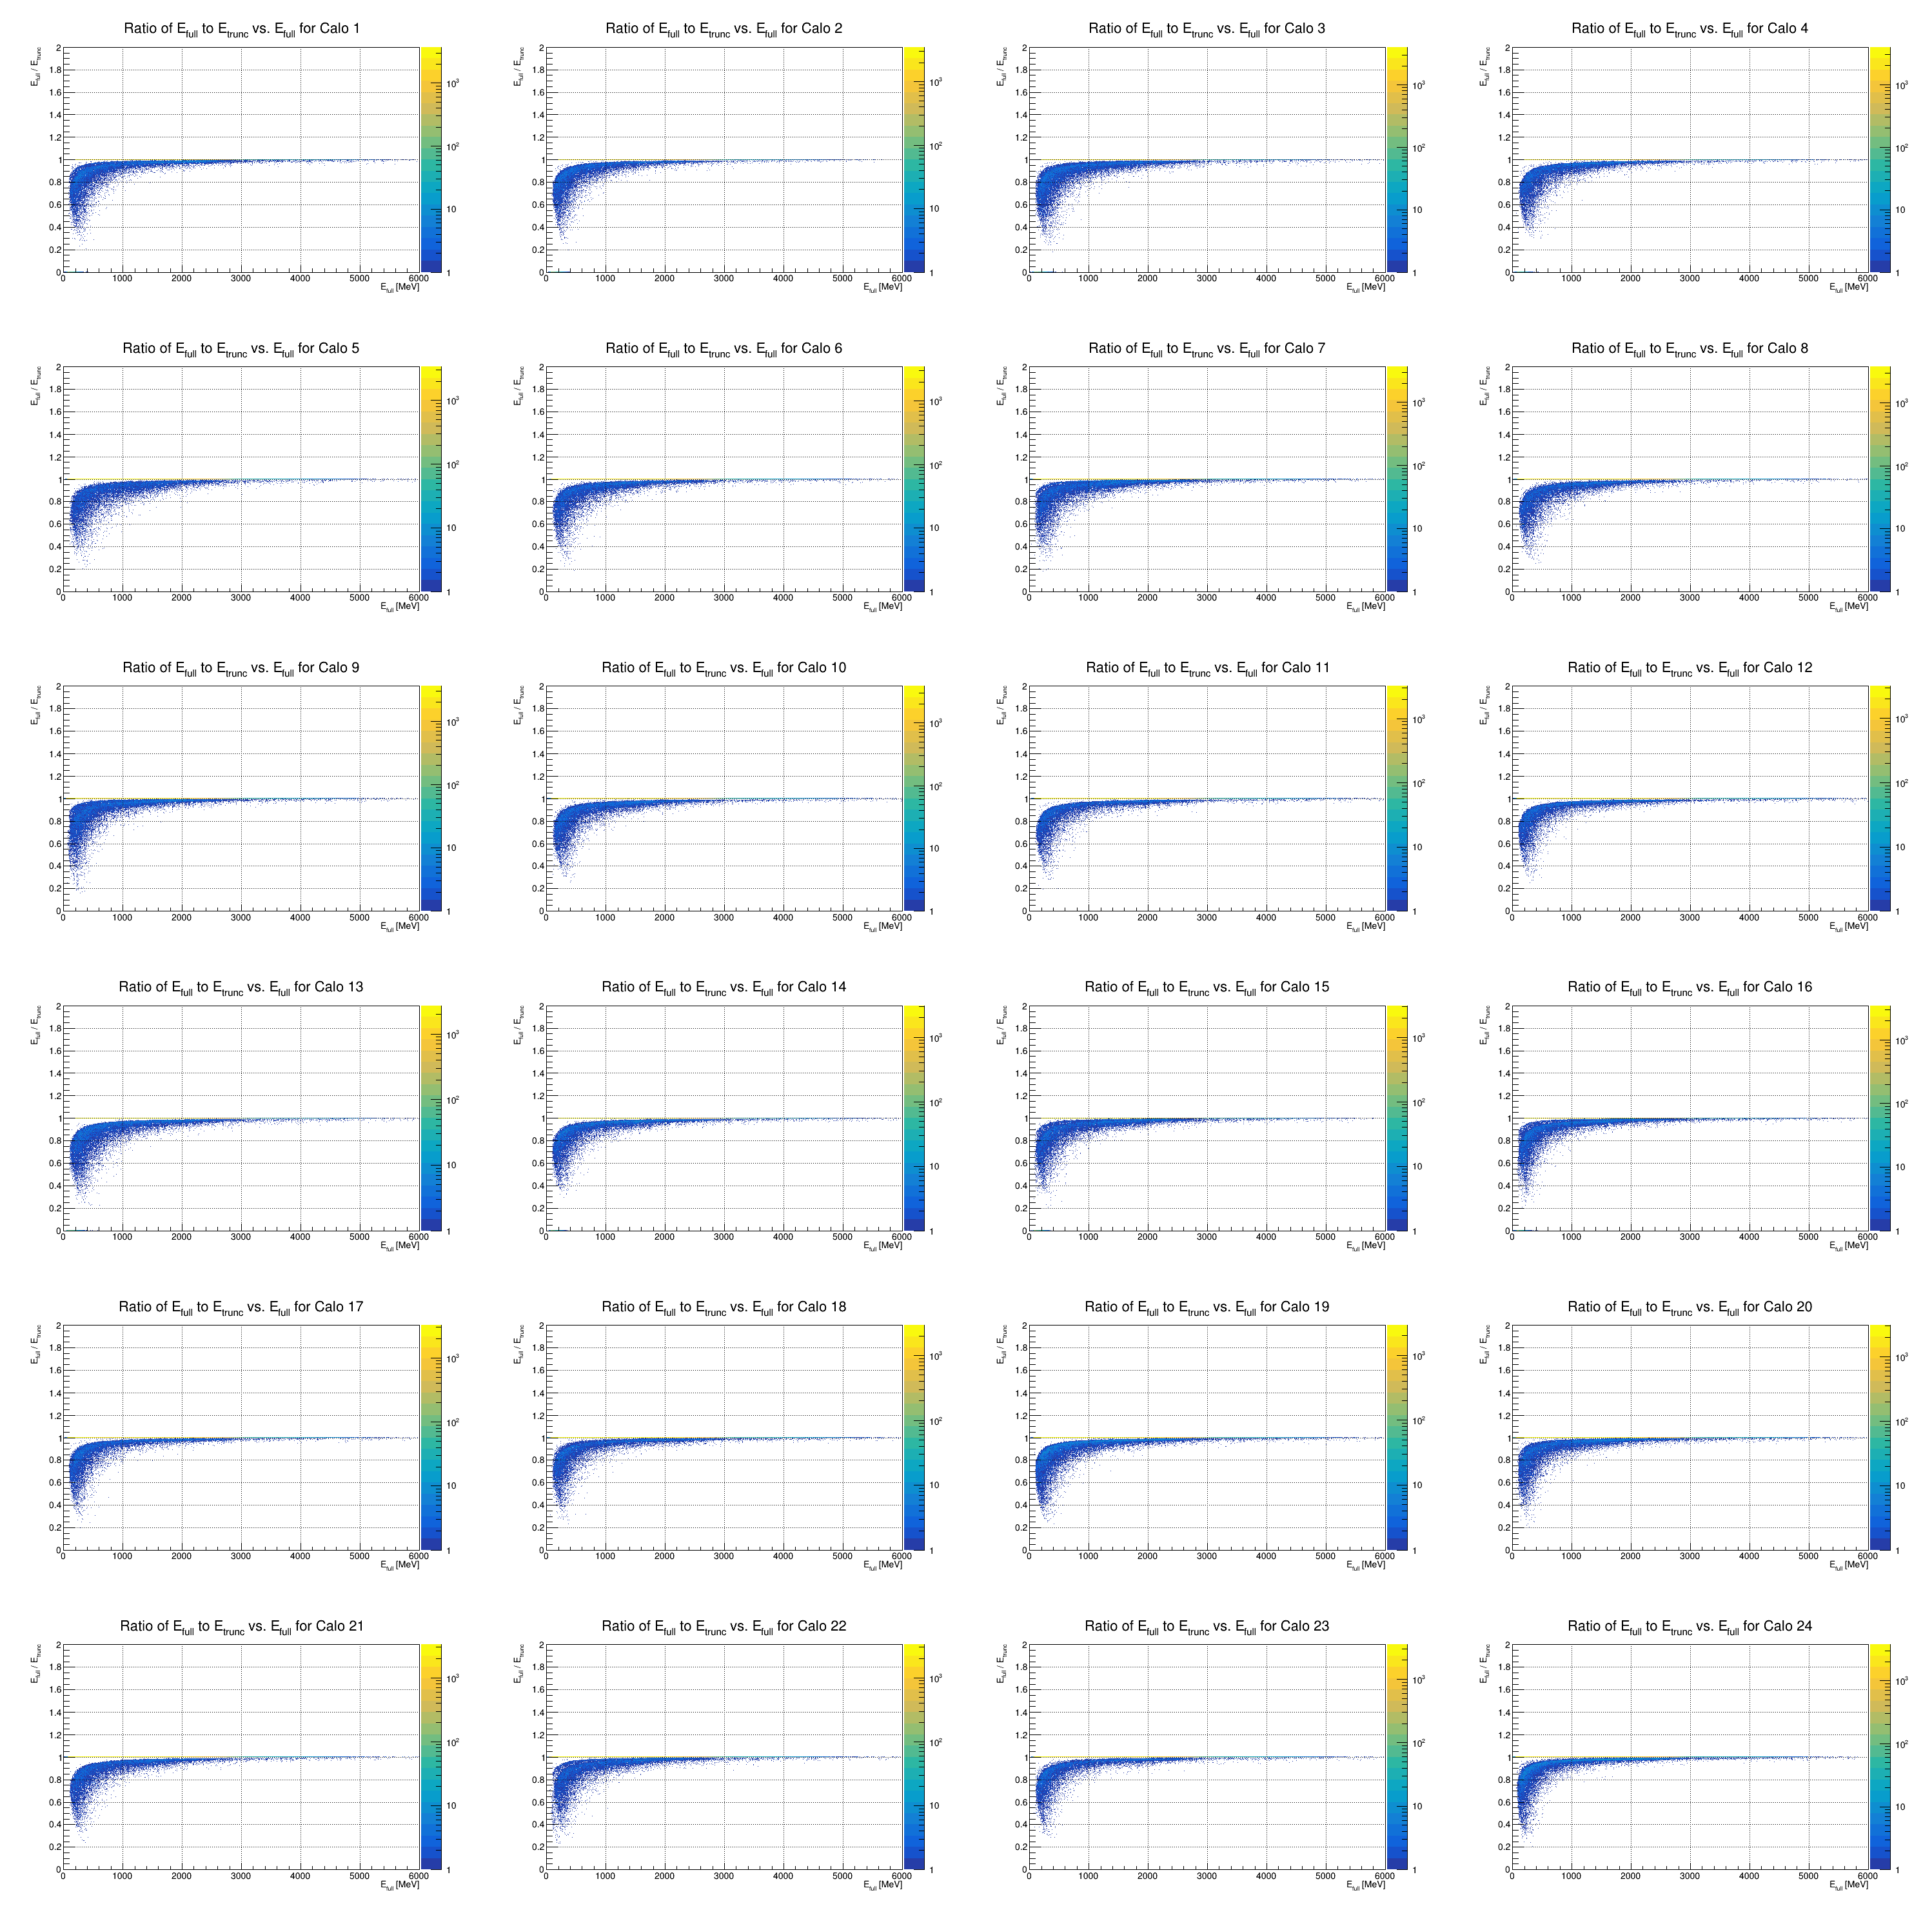

In [12]:
c = r.TCanvas("c","c",3000,3000)
c.Divide(4,6)
for i, h in enumerate(caloHists):
    c.cd(i+1)
    #h.GetYaxis().SetRangeUser(0.999,1.01)
    h.Draw("colz")
    r.gPad.SetGrid()
    r.gPad.SetLogz()

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


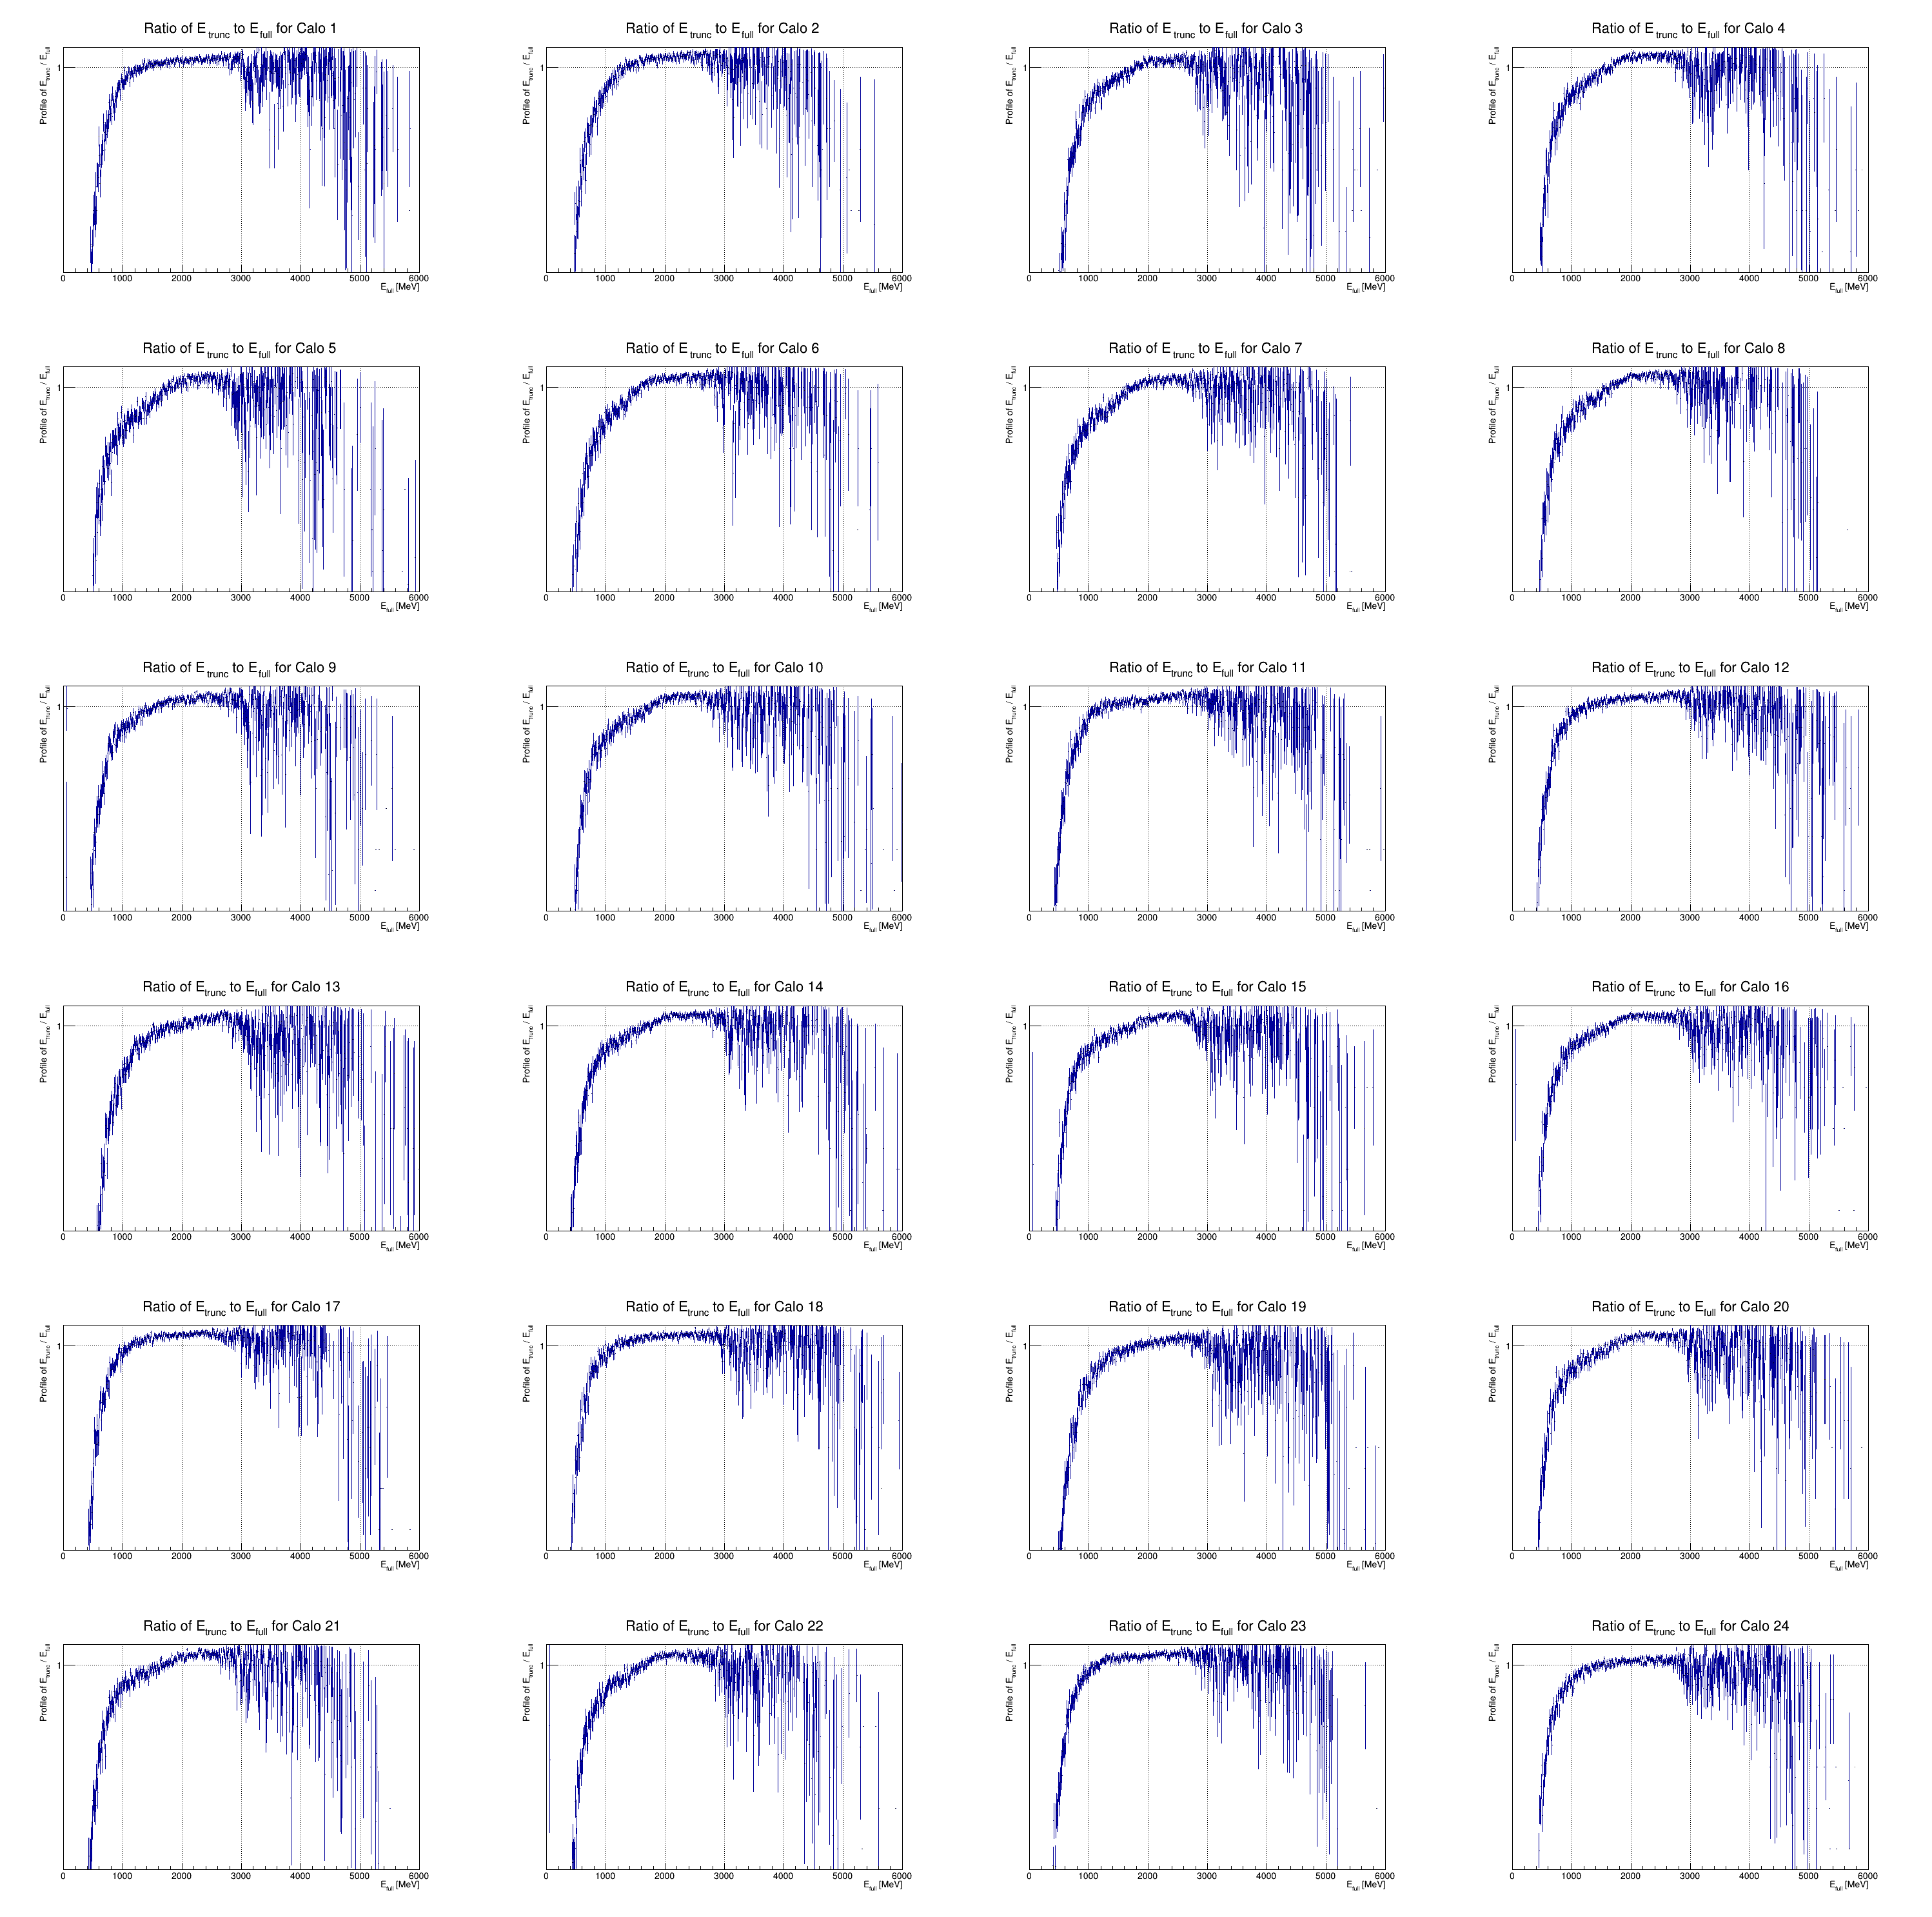

In [13]:
c = r.TCanvas("c","c",3000,3000)
c.Divide(4,6)
for i, h in enumerate(caloHists_px):
    c.cd(i+1)
    h.GetYaxis().SetRangeUser(0.99,1.001)
    h.SetTitle("Ratio of E_{trunc} to E_{full} for Calo "+str(i+1)+"; E_{full} [MeV]; Profile of E_{trunc} / E_{full}")
    h.Draw("")
    r.gPad.SetLogy()
    r.gPad.SetGrid()

c.Draw()

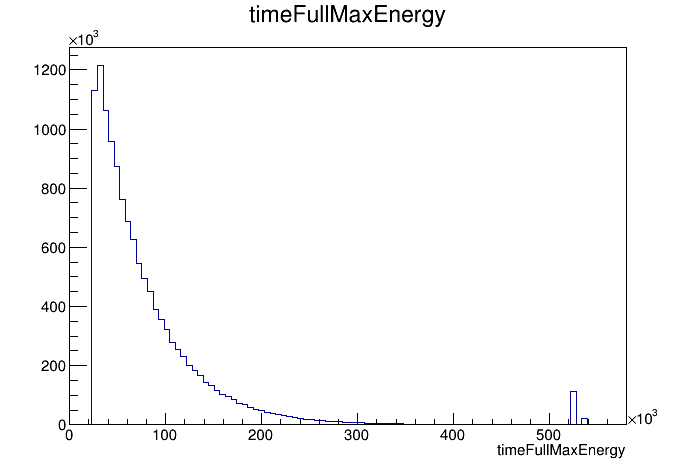

In [14]:
c = r.TCanvas()
t.Draw("timeFullMaxEnergy")
c.Draw()

---
### Now split into time domains
30-100, 100-300, 300-700

In [15]:
#times = [30,100,300,700]
times = [30,50,100,200,700]
Ntimes = len(times) - 1

In [16]:
timeHists = []
for i in range(Ntimes):
    t0 = times[i]*1000/1.25
    t1 = times[i+1]*1000/1.25
    
    caloHists = []
    for calo in range(1,25):
        print("Starting calo:", calo,"for time region", i+1)
        h = r.TH2D("h", ( "Ratio of E_{full} to E_{trunc} vs. E_{full} for Calo "+str(calo)+" in time range"
                         +str(t0)+" < t < "+str(t1)+"; E_{full} [MeV]; E_{full} / E_{trunc}" ),
                   600,0,6000,10001,0,2)
        t.Draw("energyTruncTotalEnergy/energyFullTotalEnergy:energyFullTotalEnergy>>h",
               "caloNum == "+str(calo)+" && timeFullMaxEnergy > "+str(t0)+" && timeFullMaxEnergy < "+str(t1),"goff")

        caloHists.append( h.Clone("h_"+str(calo)) )
        
    timeHists.append(caloHists)

Starting calo: 1 for time region 1
Starting calo: 2 for time region 1
Starting calo: 3 for time region 1
Starting calo: 4 for time region 1
Starting calo: 5 for time region 1
Starting calo: 6 for time region 1
Starting calo: 7 for time region 1
Starting calo: 8 for time region 1
Starting calo: 9 for time region 1
Starting calo: 10 for time region 1
Starting calo: 11 for time region 1
Starting calo: 12 for time region 1
Starting calo: 13 for time region 1
Starting calo: 14 for time region 1
Starting calo: 15 for time region 1
Starting calo: 16 for time region 1
Starting calo: 17 for time region 1
Starting calo: 18 for time region 1
Starting calo: 19 for time region 1
Starting calo: 20 for time region 1
Starting calo: 21 for time region 1
Starting calo: 22 for time region 1
Starting calo: 23 for time region 1
Starting calo: 24 for time region 1
Starting calo: 1 for time region 2
Starting calo: 2 for time region 2
Starting calo: 3 for time region 2
Starting calo: 4 for time region 2
Start

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: 

In [17]:
timeHists_px = []
for caloHists in timeHists:
    caloHists_px = []
    for h in caloHists:
        caloHists_px.append( h.ProfileX().Clone("h_px_"+str(calo)) )
        
    timeHists_px.append(caloHists_px)

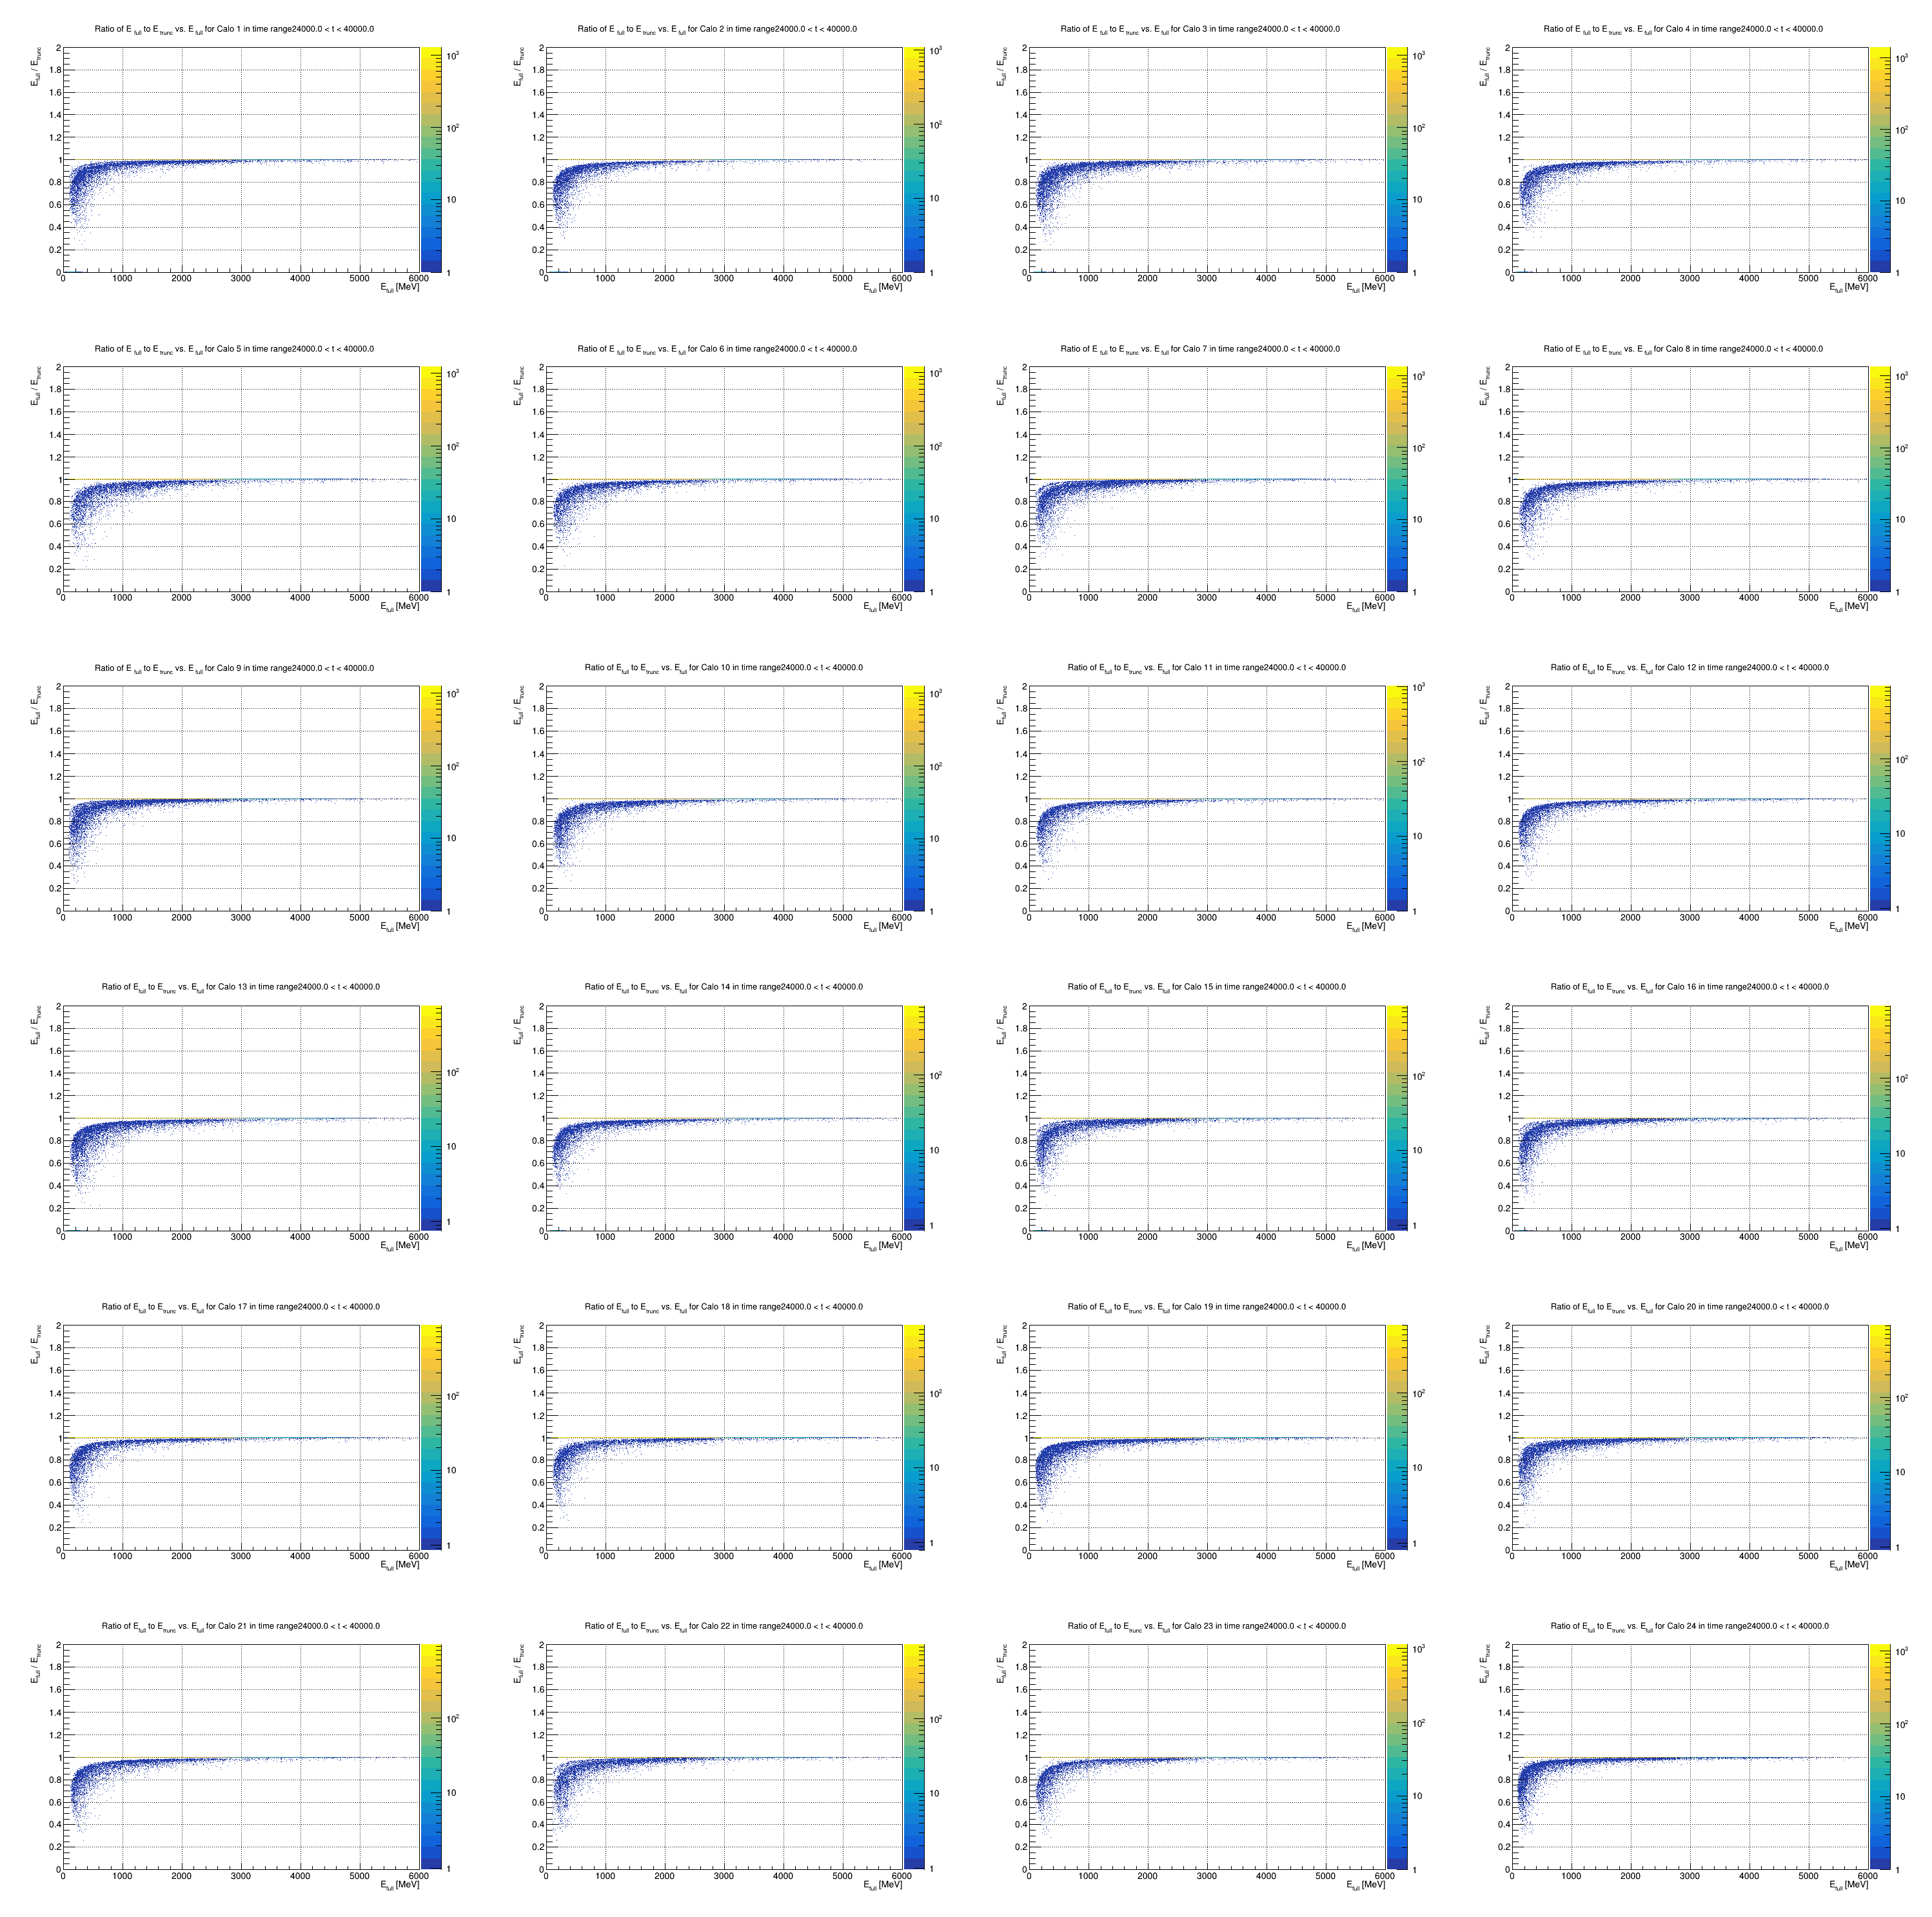

In [18]:
c = r.TCanvas("c","c",3000,3000)
c.Divide(4,6)
for i, h in enumerate(timeHists[0]):
    c.cd(i+1)
    #h.GetYaxis().SetRangeUser(0.999,1.01)
    h.Draw("colz")
    r.gPad.SetGrid()
    r.gPad.SetLogz()

c.Draw()

In [19]:
for x in timeHists:
    for h in x:
        h.Delete()

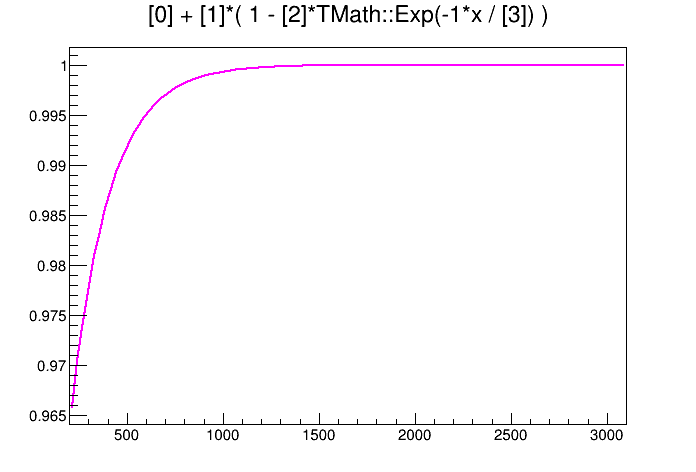

In [78]:
nPar = 4

#fLog = r.TF1("fLog","[0] + [1]*TMath::Log([2]*x + [3]*x*x + [4])",300, 3100)
#fLog.SetParameters(0,0.15,0.1,0.1,0.1)
#fLog.SetLineColor(1)

fExp = r.TF1("fExp","[0] + [1]*( 1 - [2]*TMath::Exp(-1*x / [3]) )", 200, 3100)
#fExp = r.TF1("fExp","[0] + [1]*( 1 - [2]*TMath::Exp(-1*x / [3]) - [4]*TMath::Exp(-1*x / [5]) )", 200, 2700)
fExp.SetParameters(0,1,0.1,200,0.1,500)
fExp.SetParNames("+C","A","B","#tau","D","#tau_{2}")
fExp.SetLineColor(6)

c = r.TCanvas()
#timeHists_px[0][0].GetYaxis().SetRangeUser(0.8,1.1)
#timeHists_px[0][0].Draw()
fExp.Draw("")
c.Draw()

In [79]:
logFits = []
fitErrs = []

c = r.TCanvas("c","c",2000,20000)
c.Divide(len(times) - 1,24)
for j, caloHists_px in enumerate(timeHists_px):
    logFitsi = []
    fitErrsi = []
    for i, h in enumerate(caloHists_px):
        c.cd((j+1) + (i*(len(times) - 1)))
        h.GetYaxis().SetRangeUser(0.99,1.002)
        h.Draw("")
        for i in range(2):
            h.Fit("fExp","REMBQ")
            
        #print(fExp, fExp.GetParameter(0))
        
        logFitsi.append( [ fExp.GetParameter(i) for i in range(nPar) ] )
        fitErrsi.append( [ fExp.GetParError(i) for i in range(nPar) ] )
            
        #r.gPad.SetLogy()
        r.gPad.SetGrid()
        #r.gPad.SetBottomMargin(0)
        #r.gPad.SetTopMargin(0)
        #r.gPad.SetLeftMargin(0)
        #r.gPad.SetRightMargin(0)
        
    logFits.append(logFitsi)
    fitErrs.append(fitErrsi)

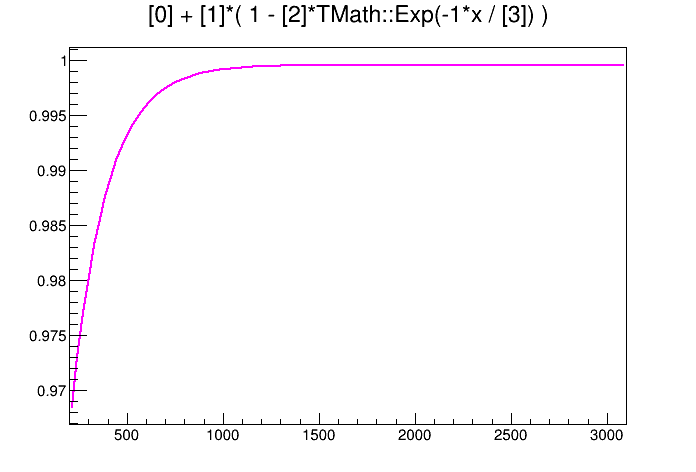

In [80]:
c = r.TCanvas()
fExp.Draw("")
c.Draw()

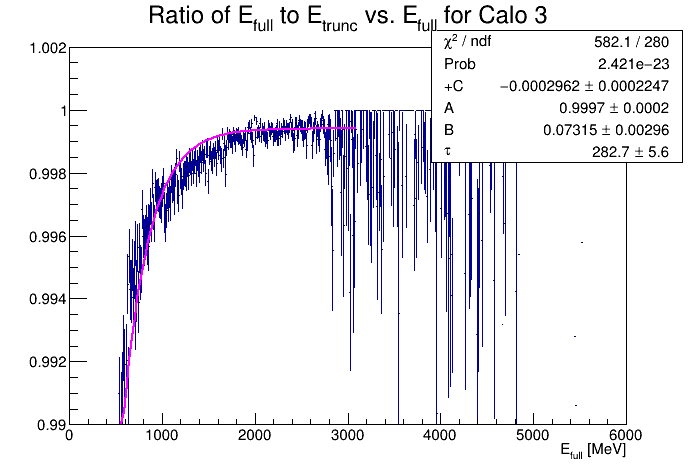

In [81]:
c = r.TCanvas()
timeHists_px[1][2].Draw("")
c.Draw()

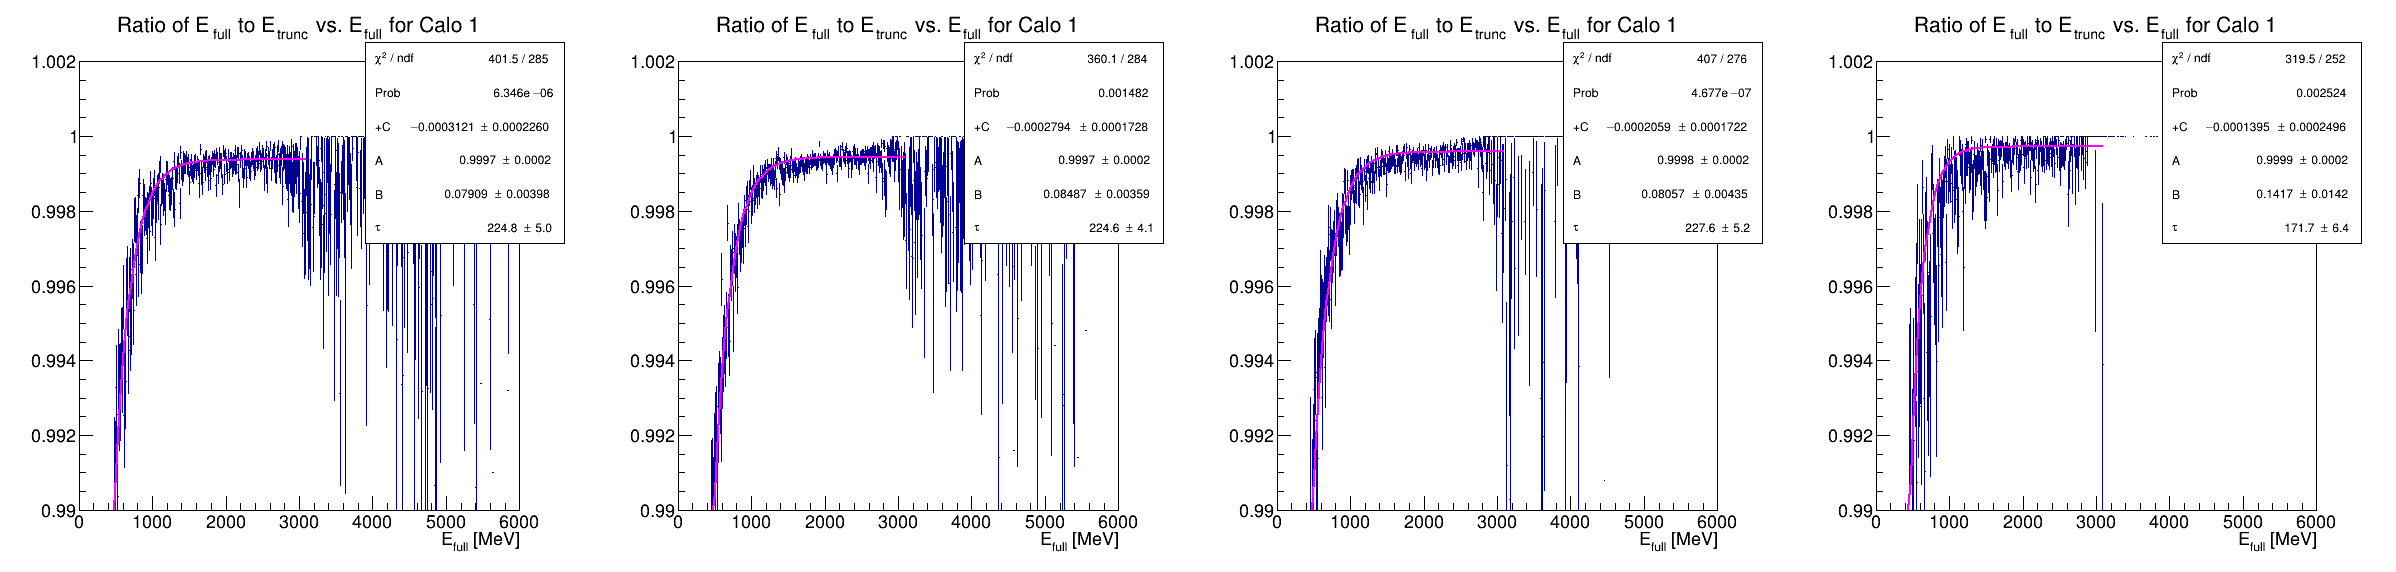

In [82]:
c = r.TCanvas("c","c",2400,600)
c.Divide(len(timeHists_px))
calo = 1
for i in range(len(timeHists_px)):
    c.cd(i+1)
    timeHists_px[i][calo - 1].Draw("")
c.Draw()

In [84]:
parameter = 3

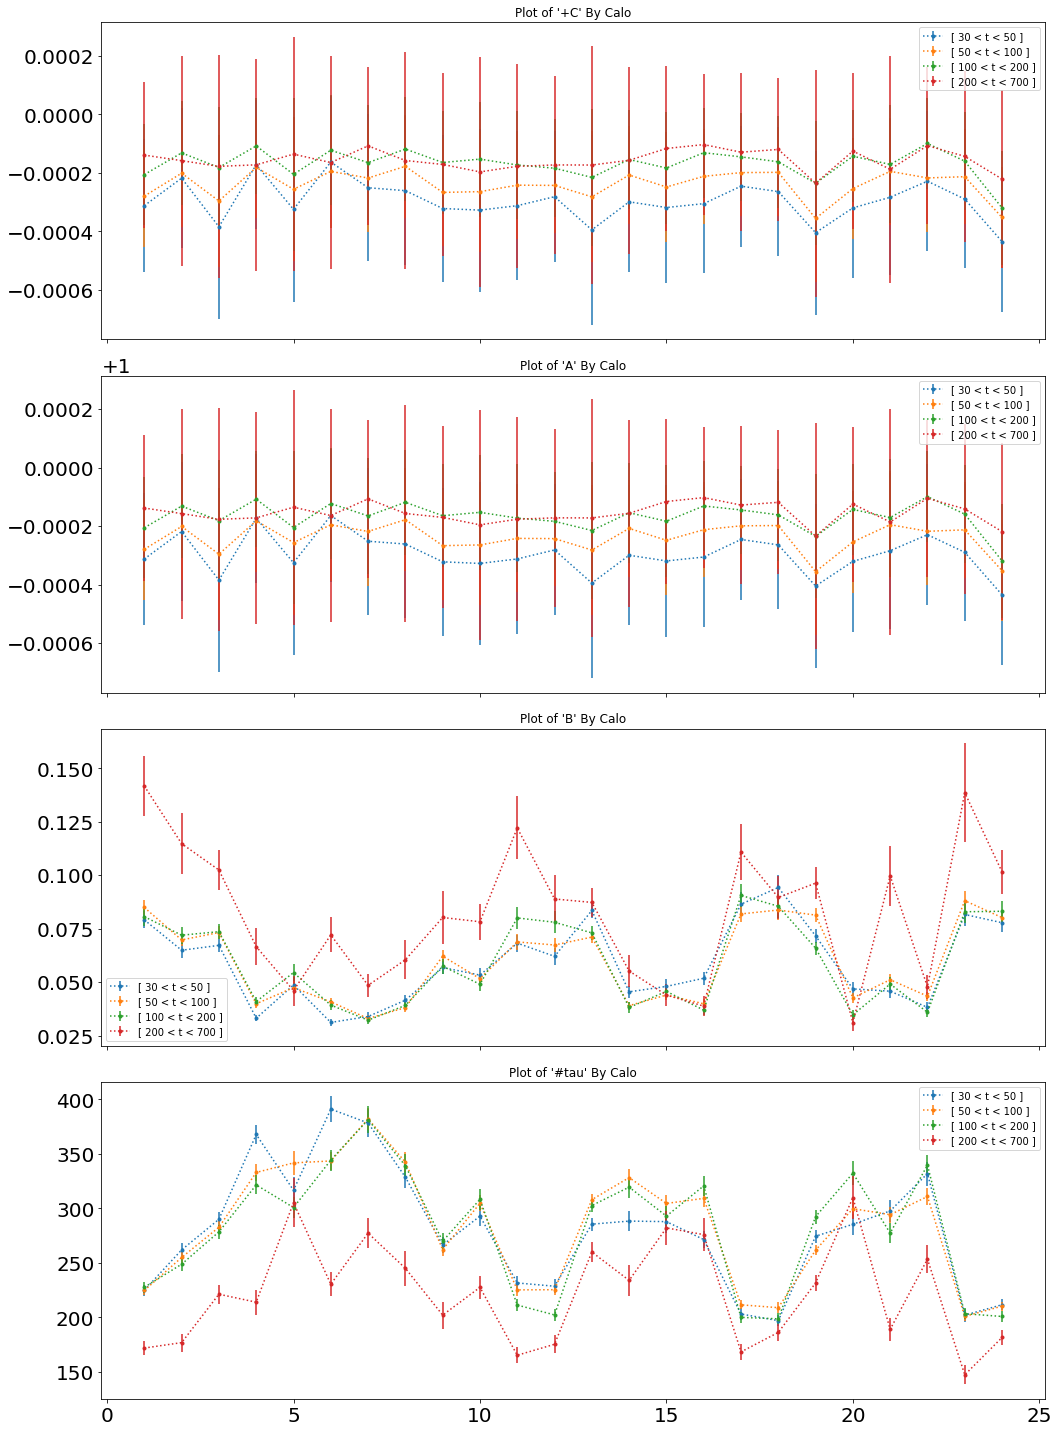

In [85]:
fig, ax = plt.subplots(nPar,1,figsize=(15,20),sharex=True)
taus = []
tauErrs = []

for j, timeDivs in enumerate(logFits):
    ding = [x for x in zip(*timeDivs)]
    dong = [x for x in zip(*fitErrs[j])]
    
    taus.append(ding[parameter])
    tauErrs.append(dong[parameter])
    
    for i, pars in enumerate(ding):
        axi = ax[i]
        #axi.plot([x for x in range(1,25)], pars, ".:", label="[ "+str(times[j])+" < t < "+str(times[j+1])+" ]")
        axi.errorbar([x for x in range(1,25)], pars,yerr=dong[i], fmt=".:", label="[ "+str(times[j])+" < t < "+str(times[j+1])+" ]")
        #plt.title("Plot of '"+fExp.GetParName(i)+"' By Calo for Time Range: [ "+str(times[j])+" < t < "+str(times[j+1])+" ]")
        axi.set_title("Plot of '"+fExp.GetParName(i)+"' By Calo")
        axi.grid()
        axi.legend()
plt.legend()
plt.tight_layout()
plt.show()

In [86]:
print(logFits[2])

[[-0.00020592287824363546, 0.9997943973747417, 0.08057111887605754, 227.60284314105087], [-0.0001318644081992503, 0.9998684292822233, 0.0719170258283756, 248.73503896517153], [-0.00018185434519827894, 0.9998184361218985, 0.07356097161071945, 278.4398305636109], [-0.0001080013181808479, 0.9998920171038874, 0.040883345022156806, 321.5566309303633], [-0.0002051212552179544, 0.999795047556524, 0.05442582570372276, 300.7962693516227], [-0.0001228109551291464, 0.9998772286969894, 0.03924043542808232, 344.28128695541153], [-0.00016514702946404414, 0.9998347607869013, 0.032165331948815774, 381.4562080159912], [-0.0001187406682562724, 0.9998813014245935, 0.03910761235159895, 339.19365761262225], [-0.00016473993489689472, 0.9998355307577554, 0.05739375776197797, 269.86509658506833], [-0.0001531729012136933, 0.9998470270600557, 0.04897074382940333, 308.2947954685961], [-0.0001731961451234573, 0.9998273454794222, 0.07998811951602454, 211.23516375432268], [-0.00018426665264747828, 0.999816263575496

In [87]:
tausByCalo = [x for x in zip(*taus)]
tauErrsByCalo = [x for x in zip(*tauErrs)]
print(tausByCalo)

[(224.81967857877643, 224.64594552659935, 227.60284314105087, 171.7483345148453), (261.88751839361987, 254.93017980702146, 248.73503896517153, 176.73935835010735), (289.9904508996219, 282.67565362931464, 278.4398305636109, 221.19351886882478), (367.88742027259, 333.00907719931797, 321.5566309303633, 213.8509332358788), (316.6670686932144, 341.76930429287813, 300.7962693516227, 305.2136048688529), (391.1405279102338, 343.5659881747106, 344.28128695541153, 230.3642175606315), (378.4606730235365, 382.17154211533057, 381.4562080159912, 277.28991527586913), (328.7012127643413, 342.4747707495663, 339.19365761262225, 244.99169725763548), (266.36399674398393, 262.1244443487272, 269.86509658506833, 202.00475232652929), (292.8760971253283, 304.728861854368, 308.2947954685961, 227.49567667680796), (231.53819084430188, 225.17152114190802, 211.23516375432268, 165.13315534472702), (228.5228346245025, 225.3275413773437, 202.16521273861306, 175.2275170498682), (285.5120705289786, 308.0142061095663, 30

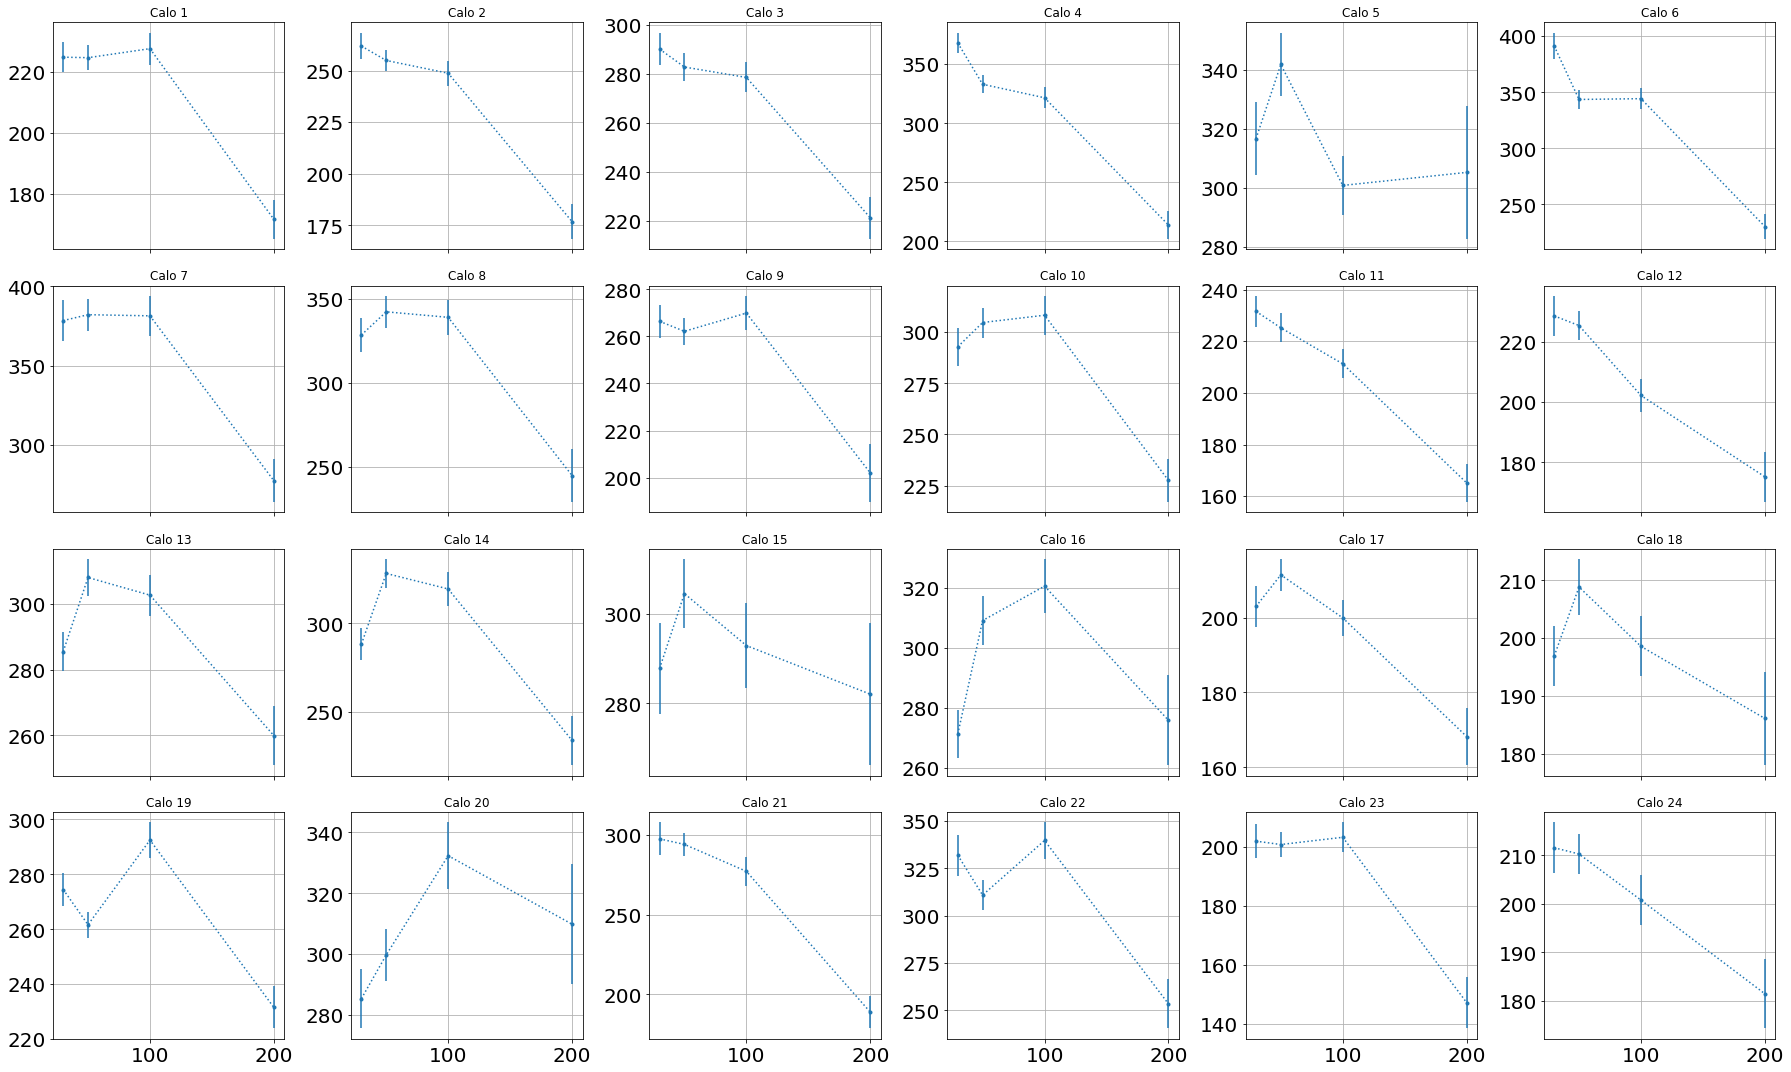

In [88]:
fig,ax = plt.subplots(4,6,figsize=(25,15),sharex=True,sharey=False)
axf = [item for sublist in ax for item in sublist]
for i, tau in enumerate(tausByCalo):
    axi = axf[i]
    axi.set_title("Calo "+str(i+1))
    axi.errorbar(times[:-1], tau,yerr=tauErrsByCalo[i],fmt=".:")
    axi.grid()
plt.tight_layout()
plt.show()

In [89]:
flin = r.TF1("flin","pol1")
slopeTaus = []
slopeTauErrs = []
for i, tau in enumerate(tausByCalo):
    gr = r.TGraphErrors()
    for j, tj in enumerate(tau):
        gr.SetPoint(j, (times[j] + times[j+1]) / 2.0, tj)
        gr.SetPointError(j, 0, tauErrsByCalo[i][j])
    gr.Fit("flin","EMBQ")
    slopeTaus.append( flin.GetParameter(1) )
    slopeTauErrs.append( flin.GetParError(1) )

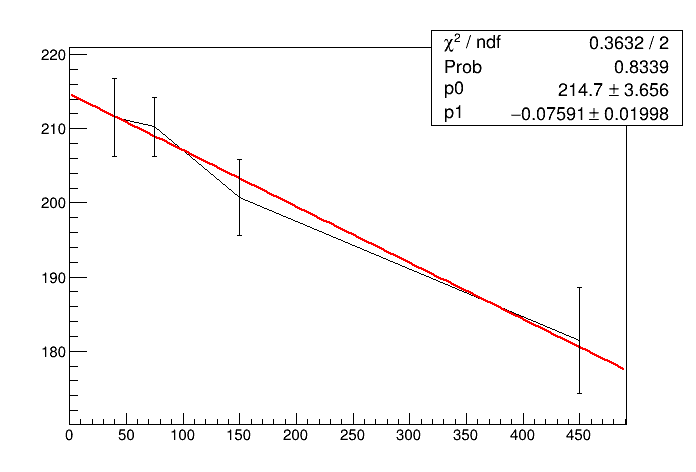

In [90]:
c = r.TCanvas()
gr.Draw()
c.Draw()

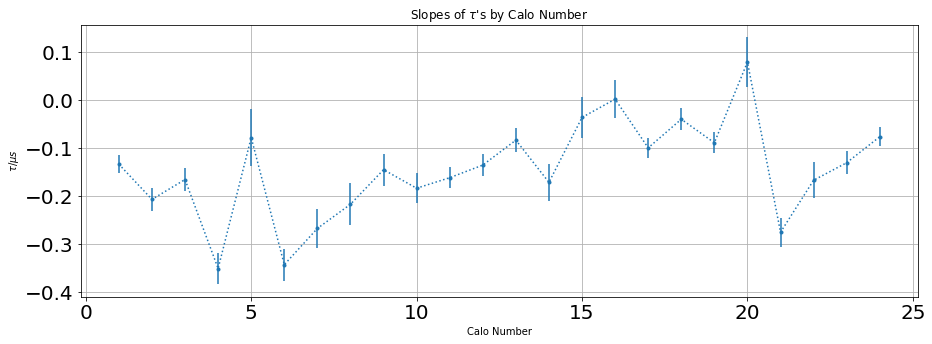

In [91]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar([x for x in range(1,25)], slopeTaus, yerr=slopeTauErrs, fmt=".:")
plt.title(r"Slopes of $\tau$'s by Calo Number")
plt.xlabel(r"Calo Number")
plt.ylabel(r"$\tau / \mu s$")
plt.grid()
plt.show()